In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.ticker import AutoMinorLocator
import re
import ast  # Import the ast module
from matplotlib.lines import Line2D

plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.rc('axes', labelsize='x-large', titlesize='x-large')
plt.rcParams['legend.title_fontsize'] = 'large'
plt.rcParams['legend.fontsize'] = 'large'

global_time = 82.06
local_time = 9.73

In [16]:
# data2 = pd.read_csv(r'C:\Users\saisa\Documents\IIScNew\IIScBack\test\test-updated\test\barplots_new\barplots_new\data\nn_modeling\NN_mobnet_MAPE_all.csv')
data2 = pd.read_csv(r'C:\Users\Kedar Dhule\Documents\Internship\plot_scripts\Fig2\Fig2C\NN_mobnet_MAPE_all.csv')

# data3 = pd.read_csv(r'C:\Users\saisa\Documents\IIScNew\IIScBack\test\test-updated\test\barplots_new\barplots_new\data\nn_modeling\NN_transfer_resnet_mobnet_MAPE_all.csv')
data3 = pd.read_csv(r'C:\Users\Kedar Dhule\Documents\Internship\plot_scripts\Fig2\Fig2C\NN_transfer_resnet_mobnet_MAPE_all.csv')

# data1['combined_obj'] = (data1['Val_MAPE_time'] + data1['Val_MAPE_power']) / 2
# data1 = data1.sort_values(by='combined_obj')
data2['combined_obj'] = (data2['Val_MAPE_time'] + data2['Val_MAPE_power']) / 2
data2 = data2.sort_values(by='combined_obj')
data3['combined_obj'] = (data3['Val_MAPE_time'] + data3['Val_MAPE_power']) / 2
data3 = data3.sort_values(by='combined_obj')



In [14]:
grouped_data2 = data2.groupby('No_powermodes')['Val_MAPE_time'].apply(lambda x: x.iloc[5])
grouped_data3 = data3.groupby('No_powermodes')['Val_MAPE_time'].apply(lambda x: x.iloc[5])

#grouped_data1_all = data1.groupby('No_powermodes')['Val_MAPE_time'].quantile(0.75) - data1.groupby('No_powermodes')['Val_MAPE_time'].quantile(0.25)
grouped_data2_all = data2.groupby('No_powermodes')['Val_MAPE_time'].quantile(0.75) - data2.groupby('No_powermodes')['Val_MAPE_time'].quantile(0.25)
grouped_data3_all = data3.groupby('No_powermodes')['Val_MAPE_time'].quantile(0.75) - data3.groupby('No_powermodes')['Val_MAPE_time'].quantile(0.25)

grouped_data_collection = data2.groupby('No_powermodes')

# Get all unique 'No_powermodes' values
all_groups = grouped_data2.index.unique()


In [17]:
data_collection_medians = []

# Load the index_data_sorted.csv file
# index_df = pd.read_csv('/home/college/Documents/iisc/edge-ml-scheduler/data/resnet_v4_runs_merged/minibatch_index_list_resnet_new.csv')

# index_df = pd.read_csv(r'C:\Users\saisa\Documents\IIScNew\IIScBack\test\test-updated\test\barplots_new\barplots_new\data\mobnet_v4_runs_merged\minibatch_index_list_mobilenet_new.csv')

data_collection_overhead = []

# Iterate over the groups
for group_name, group_data in grouped_data_collection:
    data_collection_medians.append(group_data['Data_collection_time'].iloc[5])

    data_collection_time = 0

    group_data['Sampled_powermodes'] = group_data['Sampled_powermodes'].apply(ast.literal_eval)

    for i in group_data['Sampled_powermodes'].iloc[5]:

        match = re.match(r'(\d+)_(\d+)_(\d+)_(\d+)', i)

        if match:
            #print(match.group(1))
            # Find the corresponding row in index_data_sorted.csv
            matching_row = index_df[(index_df['cores'] == int(match.group(1))) &
                                    (index_df['cpu'] == int(match.group(2))) &
                                    (index_df['gpu'] == int(match.group(3))) &
                                    (index_df['mem'] == int(match.group(4))) ]

            data_collection_time += matching_row.iloc[0]['start_time']

    #print(data_collection_time)
    data_collection_overhead.append(data_collection_time+group_data['Data_collection_time'].iloc[5])

NameError: name 'index_df' is not defined

0 10
No_powermodes
10    52.553356
Name: Val_MAPE_time, dtype: float64
1 20
No_powermodes
20    41.980167
Name: Val_MAPE_time, dtype: float64
2 30
No_powermodes
30    35.008429
Name: Val_MAPE_time, dtype: float64
3 40
No_powermodes
40    26.184675
Name: Val_MAPE_time, dtype: float64
4 50
No_powermodes
50    22.929396
Name: Val_MAPE_time, dtype: float64
5 60
No_powermodes
60    19.395376
Name: Val_MAPE_time, dtype: float64
6 70
No_powermodes
70    16.455522
Name: Val_MAPE_time, dtype: float64
7 80
No_powermodes
80    14.821666
Name: Val_MAPE_time, dtype: float64
8 90
No_powermodes
90    14.373994
Name: Val_MAPE_time, dtype: float64
9 100
No_powermodes
100    10.33141
Name: Val_MAPE_time, dtype: float64


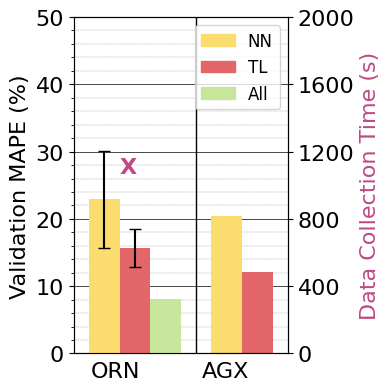

In [ ]:


# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(4, 4))


# Bar plot for 'Val_MAPE_time'
width = 2.5

for idx, group in enumerate(all_groups):


    print(idx,group)
    #medians_data1 = grouped_data1[grouped_data1.index == group] * 100
    medians_data2 = grouped_data2[grouped_data2.index == group] * 100
    medians_data3 = grouped_data3[grouped_data3.index == group] * 100
    print(medians_data2)
    if idx == 4:
        group_new = group - 40
        #ax1.bar(group - width, medians_data1, width=width, label='MLP', align='center', color='#c7e59b', zorder=3, yerr = grouped_data1_all[group] * 100, capsize = 4)
        ax1.bar(group_new - 1.25, medians_data2, width=width, label='NN', align='center', color='#fadc6f',  yerr = grouped_data2_all[group] * 100, zorder=3, capsize = 4)
        ax1.bar(group_new + 1.25, medians_data3, width=width, label='TL', align='center', color='#e36668', zorder=3,  yerr = grouped_data3_all[group] * 100, capsize = 4)
        ax1.bar(group_new + 3.75,8.12,width=width,label='',align='center',color = '#c7e59b', zorder = 3)
    
    #print(medians_data2)
    #legend_handles.extend([mpatches.Patch(color='blue'), mpatches.Patch(color='orange'), mpatches.Patch(color='green')]) #, mpatches.Patch(color='green')}


# ax1.set_xlabel('# Power modes')
ax1.set_ylabel('Validation MAPE (%)', color='black',fontsize=16)

# x = np.arange(10, 39, 10)
# ax1.set_xticks(x)
ax1.set_xticks([],[])

# ax1.set_xticklabels(['50','All','Ag Al'])

#ax1.grid(True)
# ax1.grid(axis='y')

# ax1.vlines(x=vlines_x_between,ymin=0,ymax=80,linestyles='solid',color='darkgrey',linewidth=1.5)

# ax1.grid(which='minor', linestyle='--', linewidth='0.5', color='lightgray')

# ax1.axvline(x=115, color='black', linestyle='-', linewidth=1.5)
ax1.axvline(x=(16.25), color='black', linestyle='-', linewidth=1)

ax1.set_ylim(0,50)
ax1.set_xlim(6.25,23.75)

s = 20

# ax1.text(s - 1.25, 10 + 0.5, 20.5, color='black', ha='center')
# ax1.text(s + 1.25, 75 + 0.5, 12.1, color='black', ha='center')


ax1.bar(s - 1.25, 20.5, color='#fadc6f', width=width)

ax1.bar(s + 1.25, 12.1, color='#e36668', width=width)

patch1 = mpatches.Patch(color='#fadc6f', label='NN')
patch2 = mpatches.Patch(color='#e36668', label='TL')
patch3 = mpatches.Patch(color='#c7e59b', label='All')

# Add text to the plot
ax1.text(0.08, -0.07, 'ORN', transform=ax1.transAxes, fontsize=16)
ax1.text(0.6, -0.07, 'AGX', transform=ax1.transAxes, fontsize=16)

ax1.tick_params(axis='x', which='minor', bottom=False)
ax1.tick_params(axis='both', which='major', labelsize=16)
# Add gridlines
ax1.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=1)
ax1.yaxis.grid(which='minor', linestyle='--', linewidth='0.25', color='gray')
ax1.minorticks_on()

ax1.set_axisbelow(True)
# Add the legend to the plot
plt.legend(handles=[patch1, patch2, patch3], loc='upper right')


# Create a secondary y-axis for 'Data_collection_time'
ax2 = ax1.twinx()

ax2.text(10,data_collection_medians[4], "X", fontsize=16, color='#be4986',weight='bold')
# ax2.scatter(0.2, 800 , marker='x', color='black')
# ax2.plot([0.2], [800], 'ko', markersize=10)
# Add a marker for the data collection time

# ax2.bar(0, data_collection_medians[4] , color='black', label='Data Collection Time')
#ax2.plot(all_groups, data_collection_overhead , marker='o', linestyle='-', color='red', label='Data Collection Overhead')
ax2.set_ylabel('Data Collection Time (s)', color='#be4986',fontsize=16)
ax2.set_yticks([0,400,800,1200,1600,2000])
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.set_ylim(0,2000)
# Set the same x-ticks for the secondary y-axis
# ax2.set_xticks(x)


plt.tight_layout()

plt.savefig('mobnet_motivation_time.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()




In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.ticker import AutoMinorLocator
import re
import ast  # Import the ast module
from matplotlib.lines import Line2D

plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.rc('axes', labelsize='x-large', titlesize='x-large')
plt.rcParams['legend.title_fontsize'] = 'large'
plt.rcParams['legend.fontsize'] = 'large'

global_time = 82.06
local_time = 9.73

In [18]:
# data2 = pd.read_csv(r'C:\Users\saisa\Documents\IIScNew\IIScBack\test\test-updated\test\barplots_new\barplots_new\data\nn_modeling\NN_mobnet_MAPE_all.csv')
data2 = pd.read_csv(r'C:\Users\Kedar Dhule\Documents\Internship\plot_scripts\Fig2\Fig2C\NN_mobnet_MAPE_all.csv')

# data3 = pd.read_csv(r'C:\Users\saisa\Documents\IIScNew\IIScBack\test\test-updated\test\barplots_new\barplots_new\data\nn_modeling\NN_transfer_resnet_mobnet_MAPE_all.csv')
data3 = pd.read_csv(r'C:\Users\Kedar Dhule\Documents\Internship\plot_scripts\Fig2\Fig2C\NN_transfer_resnet_mobnet_MAPE_all.csv')

# data1['combined_obj'] = (data1['Val_MAPE_time'] + data1['Val_MAPE_power']) / 2
# data1 = data1.sort_values(by='combined_obj')
data2['combined_obj'] = (data2['Val_MAPE_time'] + data2['Val_MAPE_power']) / 2
data2 = data2.sort_values(by='combined_obj')
data3['combined_obj'] = (data3['Val_MAPE_time'] + data3['Val_MAPE_power']) / 2
data3 = data3.sort_values(by='combined_obj')

grouped_data2 = data2.groupby('No_powermodes')['Val_MAPE_time'].apply(lambda x: x.iloc[5])
grouped_data3 = data3.groupby('No_powermodes')['Val_MAPE_time'].apply(lambda x: x.iloc[5])

#grouped_data1_all = data1.groupby('No_powermodes')['Val_MAPE_time'].quantile(0.75) - data1.groupby('No_powermodes')['Val_MAPE_time'].quantile(0.25)
grouped_data2_all = data2.groupby('No_powermodes')['Val_MAPE_time'].quantile(0.75) - data2.groupby('No_powermodes')['Val_MAPE_time'].quantile(0.25)
grouped_data3_all = data3.groupby('No_powermodes')['Val_MAPE_time'].quantile(0.75) - data3.groupby('No_powermodes')['Val_MAPE_time'].quantile(0.25)

grouped_data_collection = data2.groupby('No_powermodes')

# Get all unique 'No_powermodes' values
all_groups = grouped_data2.index.unique()

data_collection_medians = []

# Load the index_data_sorted.csv file
# index_df = pd.read_csv('/home/college/Documents/iisc/edge-ml-scheduler/data/resnet_v4_runs_merged/minibatch_index_list_resnet_new.csv')

index_df = pd.read_csv(r'C:\Users\saisa\Documents\IIScNew\IIScBack\test\test-updated\test\barplots_new\barplots_new\data\mobnet_v4_runs_merged\minibatch_index_list_mobilenet_new.csv')

data_collection_overhead = []

# Iterate over the groups
for group_name, group_data in grouped_data_collection:
    data_collection_medians.append(group_data['Data_collection_time'].iloc[5])

    data_collection_time = 0

    group_data['Sampled_powermodes'] = group_data['Sampled_powermodes'].apply(ast.literal_eval)

    for i in group_data['Sampled_powermodes'].iloc[5]:

        match = re.match(r'(\d+)_(\d+)_(\d+)_(\d+)', i)

        if match:
            #print(match.group(1))
            # Find the corresponding row in index_data_sorted.csv
            matching_row = index_df[(index_df['cores'] == int(match.group(1))) &
                                    (index_df['cpu'] == int(match.group(2))) &
                                    (index_df['gpu'] == int(match.group(3))) &
                                    (index_df['mem'] == int(match.group(4))) ]

            data_collection_time += matching_row.iloc[0]['start_time']

    #print(data_collection_time)
    data_collection_overhead.append(data_collection_time+group_data['Data_collection_time'].iloc[5])



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\saisa\\Documents\\IIScNew\\IIScBack\\test\\test-updated\\test\\barplots_new\\barplots_new\\data\\nn_modeling\\NN_mobnet_MAPE_all.csv'

NameError: name 's' is not defined

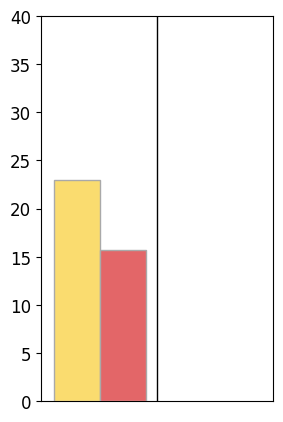

In [21]:
fig, ax1 = plt.subplots(figsize=(3, 5))


# Bar plot for 'Val_MAPE_time'
width = 2.5
#legend_handles = []
#legend_labels = ['MLP', 'NN','TL','DC Time']


for idx, group in enumerate(all_groups):


    #medians_data1 = grouped_data1[grouped_data1.index == group] * 100
    medians_data2 = grouped_data2[grouped_data2.index == group] * 100
    medians_data3 = grouped_data3[grouped_data3.index == group] * 100
    group_new = group - 40

    if idx==4:
        #ax1.bar(group - width, medians_data1, width=width, label='MLP', align='center', color='#c7e59b', zorder=3, yerr = grouped_data1_all[group] * 100, capsize = 4)
        ax1.bar(group_new - 1.8, medians_data2, width=width, label='NN', align='center', color='#fadc6f',  zorder=3,  capsize = 4, edgecolor='darkgrey')
        ax1.bar(group_new + 0.7, medians_data3, width=width, label='TL', align='center', color='#e36668', zorder=3, capsize = 4, edgecolor='darkgrey')
        # ax1.bar(group_new + 3.75,3.62,width=width,label='',align='center',color = '#c7e59b', zorder = 3)

        #print(medians_data2)
        #legend_handles.extend([mpatches.Patch(color='blue'), mpatches.Patch(color='orange'), mpatches.Patch(color='green')]) #, mpatches.Patch(color='green')

# ax1.set_ylabel('Validation MAPE (%)', color='black',fontsize=16)


# x = np.arange(10, 39, 10)
# ax1.set_xticks(x)
ax1.set_xticks([],[])

ax1.axvline(x=(12.55), color='black', linestyle='-', linewidth=1)

ax1.set_ylim(0,40)
ax1.set_xlim(6.25,18.9)

ax1.bar(s - 5.5, 20.5, color='#fadc6f', width=width, edgecolor='darkgrey')

ax1.bar(s - 3, 12.1, color='#e36668', width=width, edgecolor='darkgrey')

# ax1.bar(s - 5.5, 15.2, color='#fadc6f', width=width, edgecolor='darkgrey')

# ax1.bar(s - 3, 8.6, color='#e36668', width=width, edgecolor='darkgrey')

# patch3 = mpatches.Patch(color='#c7e59b', label='All')

# Add text to the plot
ax1.text(0.14, -0.07, 'ORN', transform=ax1.transAxes, fontsize=16)
ax1.text(0.65, -0.07, 'AGX', transform=ax1.transAxes, fontsize=16)

ax1.tick_params(axis='x', which='minor', bottom=False)
ax1.tick_params(axis='both', which='major', labelsize=16)
# Add gridlines
ax1.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
ax1.yaxis.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')
ax1.minorticks_on()

ax1.set_axisbelow(True)
# Add the legend to the plot


# Create a secondary y-axis for 'Data_collection_time'
ax2 = ax1.twinx()

#data1 = pd.read_csv(r'C:\Users\beaut\Downloads\barplots\data\nn_modeling\MLP_mobnet_MAPE_all.csv')
#data2 = pd.read_csv(r'C:\Users\saisa\Documents\IIScNew\IIScBack\test\test-updated\test\barplots_new\barplots_new\data\nn_modeling\NN_mobnet_MAPE_all.csv')
data2 = pd.read_csv(r'C:\Users\Kedar Dhule\Documents\Internship\plot_scripts\Fig2\Fig2C\NN_mobnet_MAPE_all.csv')

data3 = pd.read_csv(r'C:\Users\Kedar Dhule\Documents\Internship\plot_scripts\Fig2\Fig2C\NN_transfer_resnet_mobnet_MAPE_all.csv')

#data1['combined_obj'] = (data1['Val_MAPE_time'] + data1['Val_MAPE_power']) / 2
#data1 = data1.sort_values(by='combined_obj')
data2['combined_obj'] = (data2['Val_MAPE_time'] + data2['Val_MAPE_power']) / 2
data2 = data2.sort_values(by='combined_obj')
data3['combined_obj'] = (data3['Val_MAPE_time'] + data3['Val_MAPE_power']) / 2
data3 = data3.sort_values(by='combined_obj')

# Group the data and calculate the median of 'Val_MAPE_time'
#grouped_data1 = data1.groupby('No_powermodes')['Val_MAPE_power'].apply(lambda x: x.iloc[5])
grouped_data2 = data2.groupby('No_powermodes')['Val_MAPE_power'].apply(lambda x: x.iloc[5])
grouped_data3 = data3.groupby('No_powermodes')['Val_MAPE_power'].apply(lambda x: x.iloc[5])

#grouped_data1_all = data1.groupby('No_powermodes')['Val_MAPE_power'].quantile(0.75) - data1.groupby('No_powermodes')['Val_MAPE_power'].quantile(0.25)
grouped_data2_all = data2.groupby('No_powermodes')['Val_MAPE_power'].quantile(0.75) - data2.groupby('No_powermodes')['Val_MAPE_power'].quantile(0.25)
grouped_data3_all = data3.groupby('No_powermodes')['Val_MAPE_power'].quantile(0.75) - data3.groupby('No_powermodes')['Val_MAPE_power'].quantile(0.25)

# print(grouped_data1_all)

# Group the data and calculate the median of 'data_collection'
grouped_data_collection = data2.groupby('No_powermodes')

# Get all unique 'No_powermodes' values
all_groups = grouped_data2.index.unique()

for idx, group in enumerate(all_groups):


    #medians_data1 = grouped_data1[grouped_data1.index == group] * 100
    medians_data2 = grouped_data2[grouped_data2.index == group] * 100
    medians_data3 = grouped_data3[grouped_data3.index == group] * 100
    group_new = group - 40

    if idx==4:
        #ax1.bar(group - width, medians_data1, width=width, label='MLP', align='center', color='#c7e59b', zorder=3, yerr = grouped_data1_all[group] * 100, capsize = 4)
        ax2.plot(group_new - 1.8, medians_data2,  label='NN',  color='#af9a4d', marker='^', markeredgecolor='darkgrey',markersize=12)
        ax2.plot(group_new + 0.75, medians_data3,  label='PT', color='#9e4748', marker='^', markeredgecolor='darkgrey',markersize=12)
        ax2.plot(group_new+ 4.5, 15.2,  label='NN',  color='#af9a4d', marker='^', markeredgecolor='darkgrey',markersize=12)
        ax2.plot(group_new + 7, 8.6,  label='PT', color='#9e4748', marker='^', markeredgecolor='darkgrey',markersize=12)
        # ax1.bar(group_new + 3.75,3.62,width=width,label='',align='center',color = '#c7e59b', zorder = 3)

        #print(medians_data2)
        #legend_handles.extend([mpatches.Patch(color='blue'), mpatches.Patch(color='orange'), mpatches.Patch(color='green')]) #, mpatches.Patch(color='green')


# ax2.text(10,data_collection_medians[4], "X", fontsize=16, color='#be4986',weight='bold')
# ax2.scatter(0.2, 800 , marker='x', color='black')
# ax2.plot([0.2], [800], 'ko', markersize=10)
# Add a marker for the data collection time

# ax2.bar(0, data_collection_medians[4] , color='black', label='Data Collection Time')
#ax2.plot(all_groups, data_collection_overhead , marker='o', linestyle='-', color='red', label='Data Collection Overhead')
# ax2.set_ylabel('Data Collection Time (s)', color='#be4986',fontsize=16)
# ax2.set_yticks([0,300,600,900,1200,1500,1800])
# ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.set_ylim(0,40)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.set_yticks([],[])
patch1 = mpatches.Patch(color='#fadc6f', label='NN Time')
patch2 = mpatches.Patch(color='#e36668', label='PT Time')
patch3 = mpatches.Patch(color='#af9a4d', label='NN Pow.')
patch4 = mpatches.Patch(color='#9e4748', label='PT Pow.')

import matplotlib.lines as mlines

patch1 = mlines.Line2D([], [], color='#fadc6f', label='NN Time', marker='s', markersize=10)
patch2 = mlines.Line2D([], [], color='#e36668', label='PT Time', marker='s', markersize=10)
patch3 = mlines.Line2D([], [], color='#af9a4d', label='NN Pow.', marker='^',markeredgecolor='darkgrey', markersize=10)
patch4 = mlines.Line2D([], [], color='#9e4748', label='PT Pow.', marker='^',markeredgecolor='darkgrey', markersize=10)

plt.legend(handles=[patch1, patch2, patch3, patch4], loc='upper center',ncol=1, fontsize=13, handlelength=0, handletextpad=0.7, columnspacing=1, borderpad=0.7)
# Set the same x-ticks for the secondary y-axis
plt.text(3,20,"Prediction MAPE (%)", fontsize=18, rotation=90, verticalalignment='center', horizontalalignment='center')
# ax2.set_xticks(x)
plt.subplots_adjust(hspace=5000)
# plt.gca().margins(x=10, y=20)
plt.tight_layout()

plt.savefig('mobnet_motivation_combined.pdf', dpi=300, format='pdf', bbox_inches='tight')


plt.show()

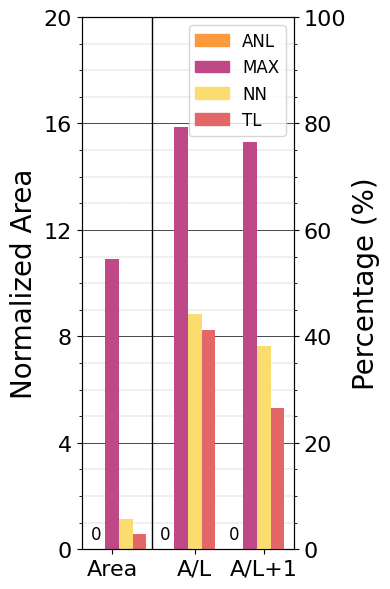

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

area = (0, 360.23, 37.47, 18.98)
percentage = (100, 20.59, 55.88, 58.82)
percentage_under = (100, 23.53, 61.76, 73.53)


# Subtract every element in percentage and percentage_under from 100
area = tuple(x / 33 for x in area)
percentage = tuple(100 - x for x in percentage)
percentage_under = tuple(100 - x for x in percentage_under)

# Figure size
fig, ax1 = plt.subplots(figsize=(4, 6))
colors = ['#fb9a3c', '#be4986', '#fadc6f', '#e36668']
# Width of a bar
width = 0.2

# Bar plot for normalized area on the left y-axis
ax1.bar((0, 0.2, 0.4, 0.6), area, width, color=colors)
ax1.set_ylim(0, 20)
ax1.set_ylabel('Normalized Area', fontsize=20)

ax1.tick_params(axis='x', which='minor', bottom=False)
ax1.minorticks_on()
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.set_axisbelow(True)
# Set custom ticks for the left y-axis
ax1.set_yticks([0, 4, 8, 12, 16, 20])

ax1.tick_params(axis='x', which='minor', bottom=False)
ax1.tick_params(axis='both', which='major', labelsize=16)
# Add gridlines
ax1.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=1)
ax1.yaxis.grid(which='minor', linestyle='--', linewidth='0.25', color='gray')
ax1.minorticks_on()


# Create a second y-axis (right) and share the same x-axis
ax2 = ax1.twinx()
ax2.bar((1, 1.2, 1.4, 1.6), percentage, width, color=colors)
ax2.bar((2, 2.2, 2.4, 2.6), percentage_under, width, color=colors)
ax2.set_ylim(0, 100)
ax2.set_ylabel('Percentage (%)', fontsize=20)

# Add a vertical dotted line
ax1.axvline(x=(0.775), color='black', linestyle='-', linewidth=1)

locations = [0.2, 1.4, 2.4]
labels = ['Area', 'A/L', 'A/L+1']
plt.xticks(locations, labels, fontsize=16)

# ax2.tick_params(axis='x', which='minor', bottom=False)
ax2.tick_params(axis='y', which='major', labelsize=16)
# # Add gridlines
# ax2.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=1)
# ax2.yaxis.grid(which='minor', linestyle='--', linewidth='0.25', color='gray')
ax2.minorticks_on()

# Axis at below = false
ax2.set_axisbelow(True)

# Write text on the plot
plt.text(-0.1, 2, '0', fontsize=12)
plt.text(0.9, 2, '0', fontsize=12)
plt.text(1.9, 2, '0', fontsize=12)

# Create patches for the legend
patch1 = mpatches.Patch(color='#fb9a3c', label='ANL')
patch2 = mpatches.Patch(color='#be4986', label='MAX')
patch3 = mpatches.Patch(color='#fadc6f', label='NN')
patch4 = mpatches.Patch(color='#e36668', label='TL')

# Add the legend to the plot
plt.legend(handles=[patch1, patch2, patch3, patch4], loc='upper right')



plt.tight_layout()

plt.savefig('PowerError_Mobnet.pdf', dpi=300, bbox_inches='tight', format='pdf')

# Show the plot
plt.show()
